In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

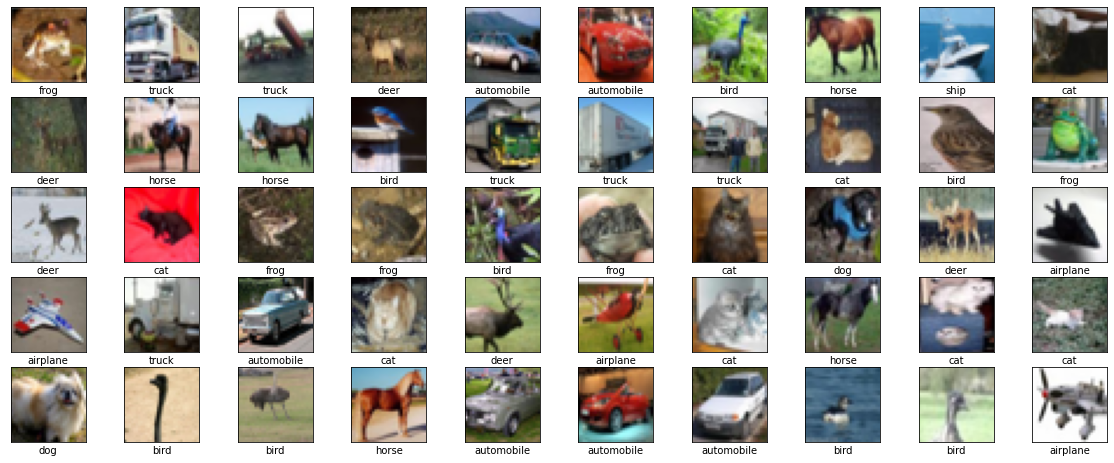

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [9]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 62s 49ms/step - loss: 1.6369 - accuracy: 0.3959 - val_loss: 1.4111 - val_accuracy: 0.4913
Epoch 2/5
1250/1250 [==============================] - 59s 47ms/step - loss: 1.3250 - accuracy: 0.5219 - val_loss: 1.2672 - val_accuracy: 0.5544
Epoch 3/5
1250/1250 [==============================] - 59s 47ms/step - loss: 1.1758 - accuracy: 0.5816 - val_loss: 1.2288 - val_accuracy: 0.5764
Epoch 4/5
1250/1250 [==============================] - 60s 48ms/step - loss: 1.0743 - accuracy: 0.6226 - val_loss: 1.1137 - val_accuracy: 0.6114
Epoch 5/5
1250/1250 [==============================] - 61s 48ms/step - loss: 0.9950 - accuracy: 0.6482 - val_loss: 1.0524 - val_accuracy: 0.6334


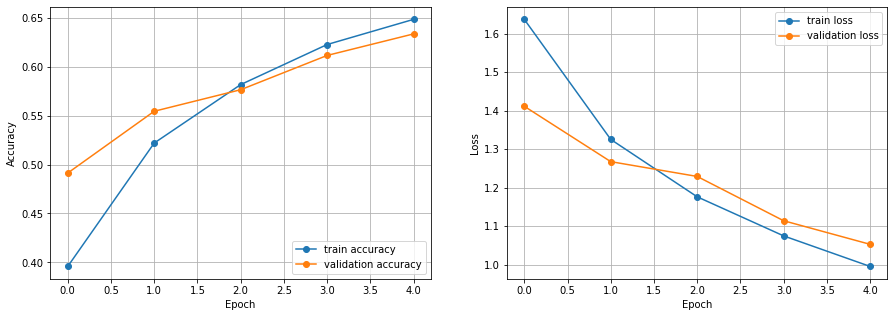

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 14ms/step - loss: 1.0608 - accuracy: 0.6273

Test Accuracy: 0.6273000240325928

Test Loss: 1.0608247518539429


In [13]:
predictions = model.predict(X_test)

In [14]:
predictions[0]

array([0.00743742, 0.00174538, 0.03191429, 0.8079282 , 0.00620359,
       0.06182855, 0.05961365, 0.00181104, 0.02016756, 0.00135026],
      dtype=float32)

In [15]:
np.argmax(predictions[0])

3

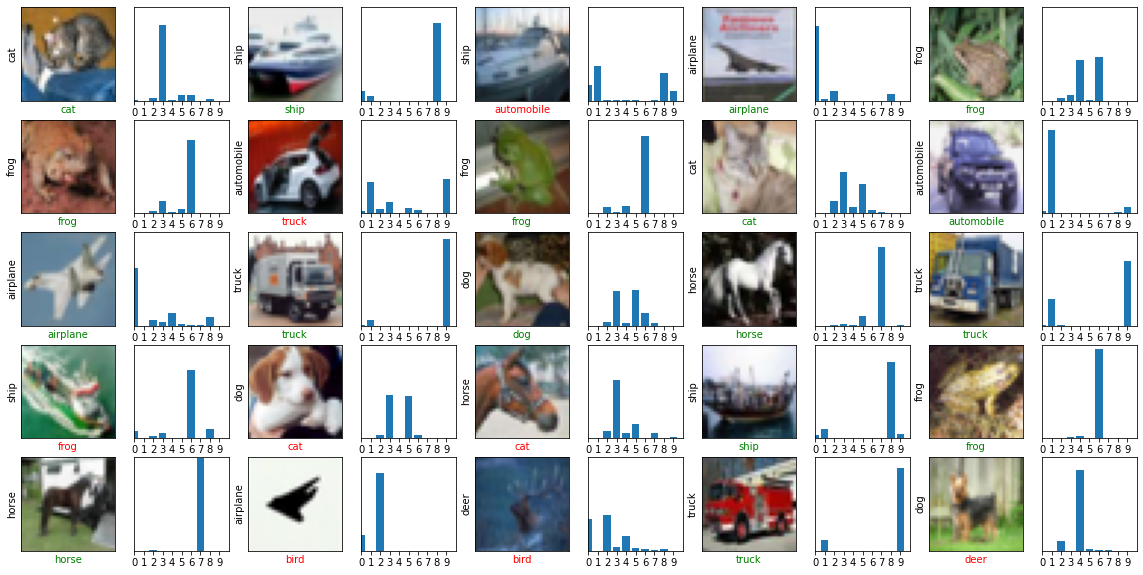

In [16]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()
